In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#machine learning
#from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
plt.rcParams["axes.labelsize"] = 18
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
train = pd.read_csv('C:\\boznia\\financial-inclusion-in-africa\\Train.csv')
test = pd.read_csv('C:\\boznia\\financial-inclusion-in-africa\\Test.csv')
ss = pd.read_csv('C:\\boznia\\financial-inclusion-in-africa\\SampleSubmission.csv')
variables = pd.read_csv('C:\\boznia\\financial-inclusion-in-africa\\VariableDefinitions.csv')

In [7]:
#let`s observe the shape of our datasets.
print('train data shape :',train.shape)
print('test data shape :',test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [8]:
#show list of columns in train data
list(train.columns)

['country',
 'year',
 'uniqueid',
 'bank_account',
 'location_type',
 'cellphone_access',
 'household_size',
 'age_of_respondent',
 'gender_of_respondent',
 'relationship_with_head',
 'marital_status',
 'education_level',
 'job_type']

In [9]:
#inspect train data
train.head(6)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed


In [10]:
#check for missing values
print('missing values:',train.isnull().sum().sum())

missing values: 0


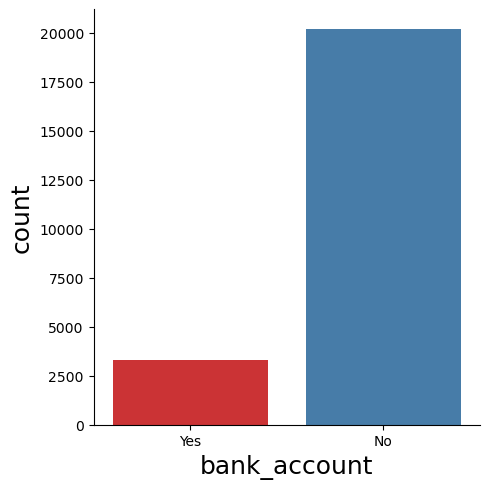

In [21]:
#explore target distribution
sns.catplot(x="bank_account",kind="count",data=train,palette="Set1")

In [22]:
#view submission file
ss.tail(6)

,unique_id,bank_account
33604,uniqueid_2997 x Uganda,0
33605,uniqueid_2998 x Uganda,0
33606,uniqueid_2999 x Uganda,0
33607,uniqueid_3000 x Uganda,0
33608,uniqueid_3001 x Uganda,0
33609,uniqueid_3002 x Uganda,0


In [23]:
#lets view the variables
variables.T

,0,1,2,3,4,5,6,7,8,9,10,11
Variable Definitions,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
Unnamed: 1,Country interviewee is in.,Year survey was done in.,Unique identifier for each interviewee,"Type of location: Rural, Urban","If interviewee has access to a cellphone: Yes, No",Number of people living in one house,The age of the interviewee,"Gender of interviewee: Male, Female",The interviewee’s relationship with the head o...,The martial status of the interviewee: Married...,Highest level of education: No formal educatio...,Type of job interviewee has: Farming and Fishi...


In [24]:
#UNIVARIATE ANALYSIS
train['bank_account'].value_counts()

bank_account
No     20212
Yes     3312
Name: count, dtype: int64

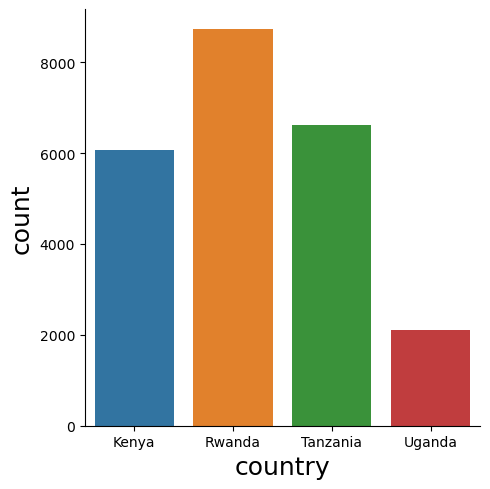

In [25]:
sns.catplot(x="country",kind="count",data=train)

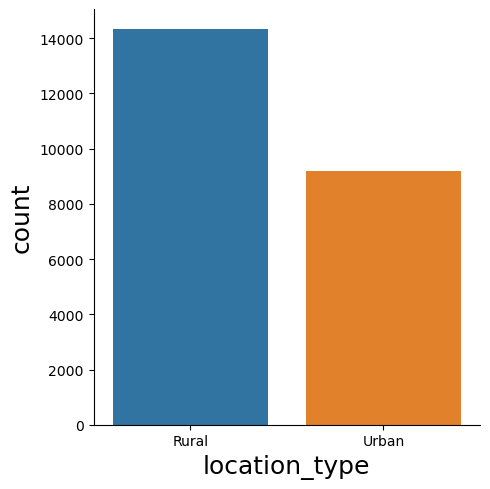

In [26]:
sns.catplot(x="location_type",kind="count",data=train)

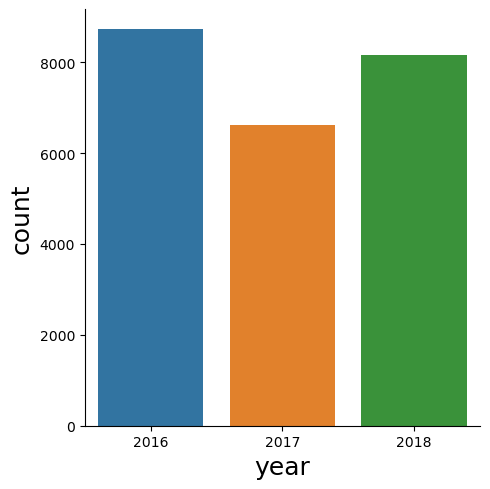

In [27]:
sns.catplot(x="year",kind="count",data=train)

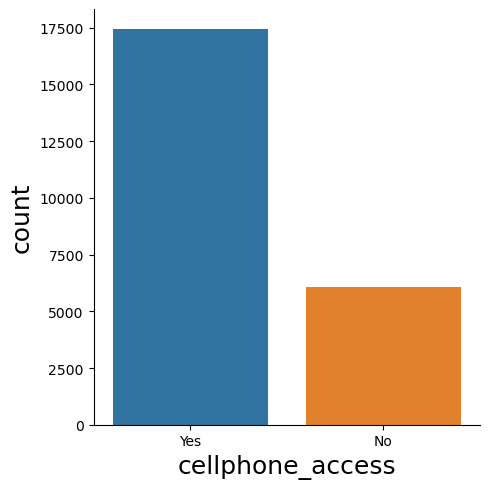

In [28]:
sns.catplot(x="cellphone_access",kind="count",data=train)

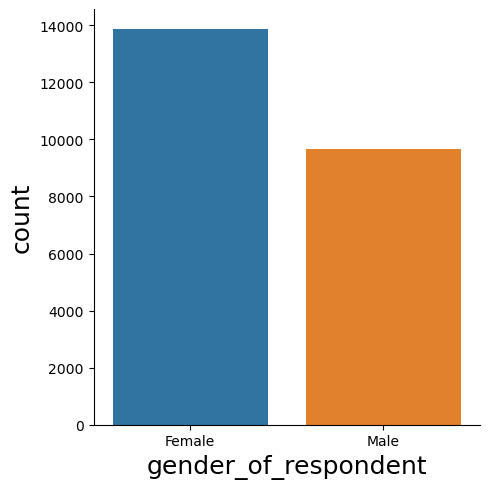

In [29]:
sns.catplot(x="gender_of_respondent",kind="count",data=train)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Spouse'),
  Text(1, 0, 'Head of Household'),
  Text(2, 0, 'Other relative'),
  Text(3, 0, 'Child'),
  Text(4, 0, 'Parent'),
  Text(5, 0, 'Other non-relatives')])

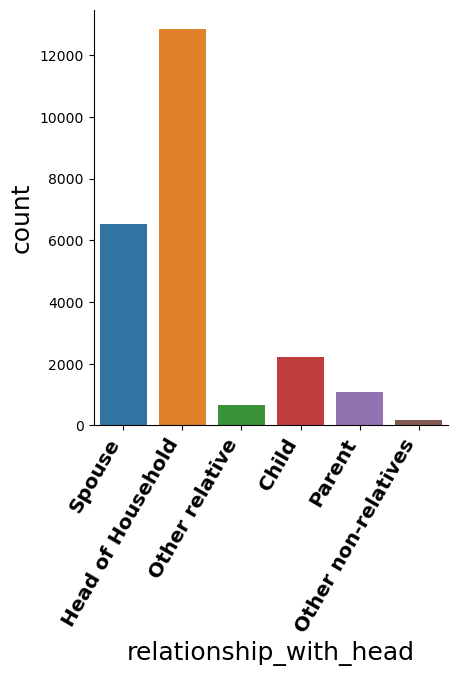

In [34]:
sns.catplot(x="relationship_with_head",kind="count",data=train)
plt.xticks(
    rotation=60,horizontalalignment='right',fontweight='bold',fontsize='x-large')

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Married/Living together'),
  Text(1, 0, 'Widowed'),
  Text(2, 0, 'Single/Never Married'),
  Text(3, 0, 'Divorced/Seperated'),
  Text(4, 0, 'Dont know')])

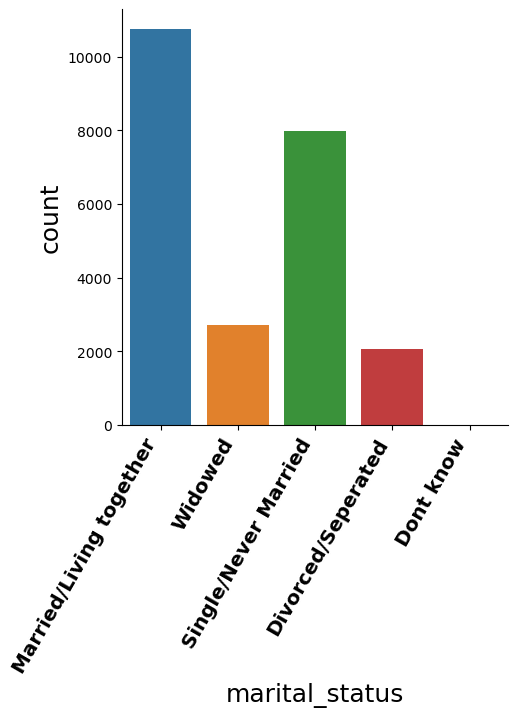

In [37]:
sns.catplot(x="marital_status",kind="count",data=train)
plt.xticks(
    rotation=60,horizontalalignment='right',fontweight='bold',fontsize='x-large')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Self employed'),
  Text(1, 0, 'Government Dependent'),
  Text(2, 0, 'Formally employed Private'),
  Text(3, 0, 'Informally employed'),
  Text(4, 0, 'Formally employed Government'),
  Text(5, 0, 'Farming and Fishing'),
  Text(6, 0, 'Remittance Dependent'),
  Text(7, 0, 'Other Income'),
  Text(8, 0, 'Dont Know/Refuse to answer'),
  Text(9, 0, 'No Income')])

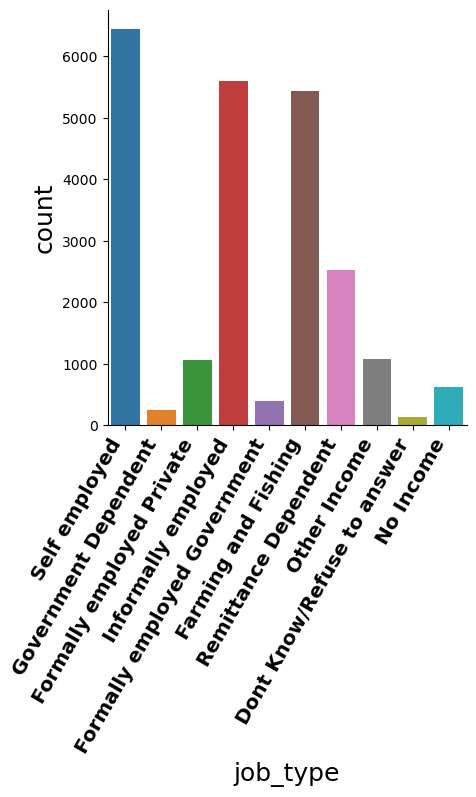

In [38]:
sns.catplot(x='job_type',kind='count',data=train)
plt.xticks(rotation=60,horizontalalignment='right',fontweight='bold',fontsize='x-large')

Text(0.5, 0, 'household size')

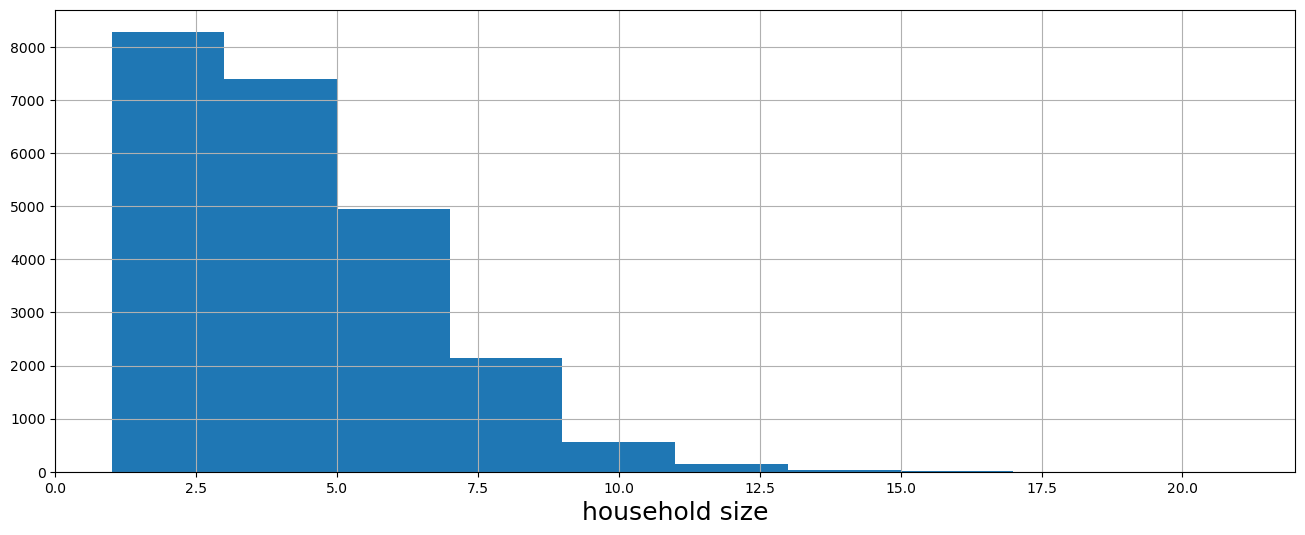

In [39]:
#distribution
plt.figure(figsize=(16,6))
train.household_size.hist()
plt.xlabel('household size')

(array([0, 1]), [Text(0, 0, 'Rural'), Text(1, 0, 'Urban')])

<Figure size 1600x600 with 0 Axes>

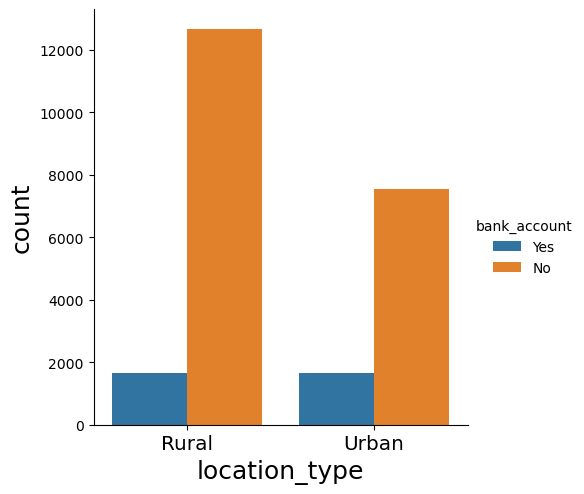

In [40]:
#bivariate analysis
plt.figure(figsize=(16,6))
sns.catplot(x='location_type', hue='bank_account',kind='count', data=train)
plt.xticks(fontweight='light',fontsize='x-large')

(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

<Figure size 1600x600 with 0 Axes>

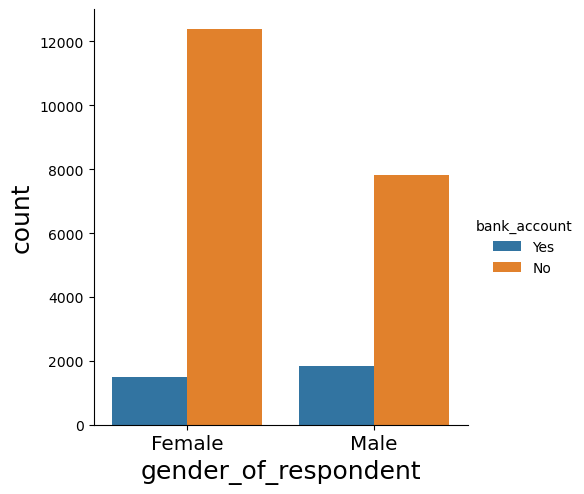

In [44]:
#bivariate analysis
plt.figure(figsize=(16,6))
sns.catplot(x='gender_of_respondent',hue='bank_account',kind='count',data=train)
plt.xticks(fontweight='light', fontsize='x-large')

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

<Figure size 1600x600 with 0 Axes>

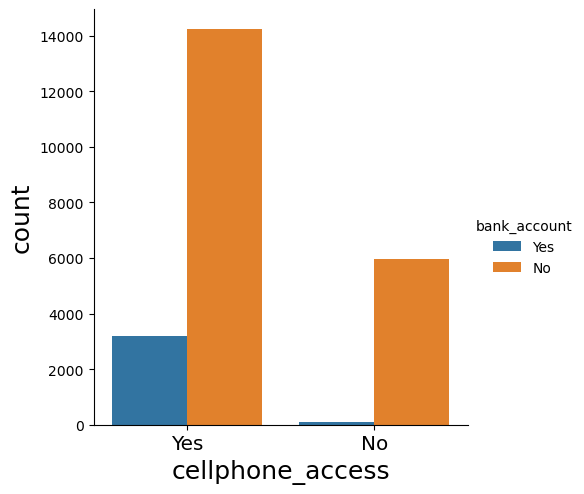

In [47]:
#bivariate analysis
plt.figure(figsize=(16,6))
sns.catplot(x='cellphone_access',hue='bank_account', kind='count',data=train)
plt.xticks(fontweight='light',fontsize='x-large')

In [49]:
#importing preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
#convert target label to numerical data
le= LabelEncoder()
train['bank_account']=le.fit_transform(train['bank_account'])
#separatng training features from target
x_train=train.drop(['bank_account'],axis=1)
y_train=train['bank_account']
print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [69]:
#function to preprocessing our data from train models
def preprocessing_data(data):
    #convert the following numerical labels from interger to flot
    float_array=data[["household_size","age_of_respondent","year"]].values.astyype(float)
    
    #categoricsl features to be anverted to ne encoding
    categ=["relationship_with_head","marital_status","education_level","job_type","country"]
    #one hot encoding conversion
    data=pd.get_dummies(data,prefix_sep="_",columns=categ)

    data["location_type"]=le.fit_transform(data["location_type"])
    data["cellphone_access"]=le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"]=le.fit_transform(data["gender_of_respondent"])
    #drop uniquid column
    data=data.drop(["uniqueid"],axis=1)
    #scale our data into range of 1 and 0
    scler =MinMaxScaler(feature_range=(0,1))
    data=scaler.fit_transform(data)
    return data
    